In [2]:
import pandas as pd 

file = 'fish.csv'

In [3]:
# 데이터 파일 설정
fishDf = pd.read_csv(file, usecols=['Species', 'Length', 'Width'])
fishDf.info

<bound method DataFrame.info of     Species  Length   Width
0     Bream    25.4  4.0200
1     Bream    26.3  4.3056
2     Bream    26.5  4.6961
3     Bream    29.0  4.4555
4     Bream    29.0  5.1340
..      ...     ...     ...
154   Smelt    12.2  1.3936
155   Smelt    12.4  1.2690
156   Smelt    13.0  1.2558
157   Smelt    14.3  2.0672
158   Smelt    15.0  1.8792

[159 rows x 3 columns]>

In [4]:
# 컬럼별 고유값으로 이상치 확인
print(fishDf['Species'].unique)
print(fishDf['Length'].unique)
print(fishDf['Width'].unique)

<bound method Series.unique of 0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object>
<bound method Series.unique of 0      25.4
1      26.3
2      26.5
3      29.0
4      29.0
       ... 
154    12.2
155    12.4
156    13.0
157    14.3
158    15.0
Name: Length, Length: 159, dtype: float64>
<bound method Series.unique of 0      4.0200
1      4.3056
2      4.6961
3      4.4555
4      5.1340
        ...  
154    1.3936
155    1.2690
156    1.2558
157    2.0672
158    1.8792
Name: Width, Length: 159, dtype: float64>


In [5]:
# 결측치 확인 => isna(), isnull()
fishDf.isnull().sum() # isnull은 NaN 이면 True(=1), 값이 있으면 0이므로 sum()을 통해 NaN의 개수를 확인할 수 있다.

Species    0
Length     0
Width      0
dtype: int64

In [6]:
fishDf.duplicated().sum() # duplicated만 쓰면 값만 나오고, duplicated()쓰면 중복값만 True로 나오기때문에 sum을 하면 중복값의 개수를 알 수 있음.

5

In [7]:
# Bream, Smelt 두 가지 품종의 데이터만 추출
# 필터링 조건을 변수로 지정.
mask = fishDf['Species'].isin(['Bream', 'Smelt'])

# 필터링 된 내용을 새 변수에 저장.
twoFishDf = fishDf[mask]

# 인덱스를 새로 지정.
twoFishDf = twoFishDf.reset_index(drop=True) 

# reset_index 기존 행 인덱스를 제거하고 인덱스를 데이터 열로 추가.
# drop = True로 지정하면 기존 인덱스 삭제.

#twoFishDf

In [8]:
# 학습용 데이터 준비

# feature(속성)
feature = twoFishDf[twoFishDf.columns[1:]] # 해당 데이터는 라벨을 제외한 수치데이터


# target(라벨)
target = twoFishDf['Species']
target = target.replace({'Bream':0, 'Smelt':1}).copy() 

# Bream, Smelt를 각각 0,1으로 변경.
# 이진 분류의 경우 모델이 라벨을 더 잘 이해할 수 있게 하기 위해 0,1로 변경할 수 있음.

In [9]:
# 학습 데이터
from sklearn.neighbors import KNeighborsClassifier

# k-최근접 이웃 분류 알고리즘
# 가장 중요한 hyperparameter인 K값은 근처에 참고(reference)할 이웃의 숫자
# 가장 가깝게 위치하는 멤버로 분류하는 방식

In [10]:
# (4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()

# (4-2) 학습 진행 fit(2D, 1D)
model.fit(feature, target)

KNeighborsClassifier()

In [11]:
#(5) 학습 후 검사 즉 테스트 => 메서드 : score()
#- 결괏값 : 0.0(0%) ~ 1.0(100%)
#- 사용데이터 -> 학습에 사용되지 않은 데이터 ( ※ 사용한 데이터를 쓰면 1.0이 나옴.)
model.score(feature, target)

1.0

In [77]:
#(6) 예측 즉 서비스에 모델 활용 시 사용 
# => 메서드:predict(), predict_proba() (predict()=> 결과만 줌.)
# 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터가 전달되어야 한다.

bdata = pd.DataFrame([[40, 10]], columns =model.feature_names_in_)
model.predict(bdata) # ndata의 데이터 값을 보고 출력.
model.predict_proba(bdata) # ndata가 각 클래스에 해당할 확률 출력

array([[1., 0.]])

In [78]:
sdata = pd.DataFrame([[12, 12]], columns =model.feature_names_in_)
model.predict(sdata) # sdata의 데이터 값을 보고 분류해서 라벨을 출력.
model.predict_proba(sdata) # 둘 중 어느 것에 해당하는지 확률 출력.

array([[0., 1.]])

In [79]:
# 데이터와 최근접 이웃 데이터 => kneighbors() 메서드
# 반환값 : 거리, 원소번호(인덱스)
dis, ind = model.kneighbors(bdata)
print(f'거리 : {dis}\n원소번호 : {ind}') # 거리 수치는 적을 수록 가까이에 있는 것.(유클리드 거리 = 두 점 사이의 거리.)

거리 : [[3.28853312 3.40294832 3.7647404  3.9866552  3.999908  ]]
원소번호 : [[32 33 34 30 31]]


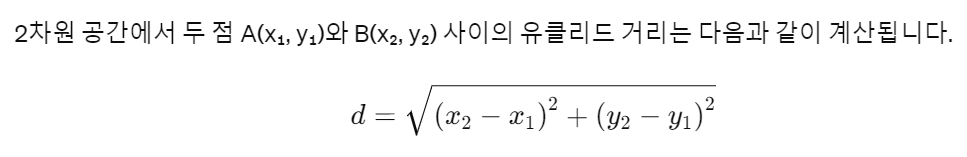

In [80]:
#ndarray => list
ind.tolist()[0] # 최근접 이웃 인덱스 번호만 뽑아오기.

# 2차원 배열을 1차원으로..
ind.flatten() 

array([32, 33, 34, 30, 31], dtype=int64)

In [81]:
#K개의 최근접 이웃 데이터만 저장
# kneighborDF = feature.iloc[ind.tolist()[0]]
kneighborDF = feature.iloc[ind.flatten()] # 최근접 이웃 인덱스만 뽑아온 다음 인덱스를 통해서 해당 행만 추출.
kneighborDF

,Length,Width
32,39.5,6.7497
33,41.0,6.7473
34,41.0,6.3705
30,38.5,6.3063
31,38.5,6.2920


In [82]:
kneighborDF.shape

(5, 2)

In [83]:
# Weight & Length 시각화
# (1) 모듈 불러오기
import matplotlib.pyplot as plt

<Axes: title={'center': '[scatter]'}, xlabel='Width', ylabel='Length'>

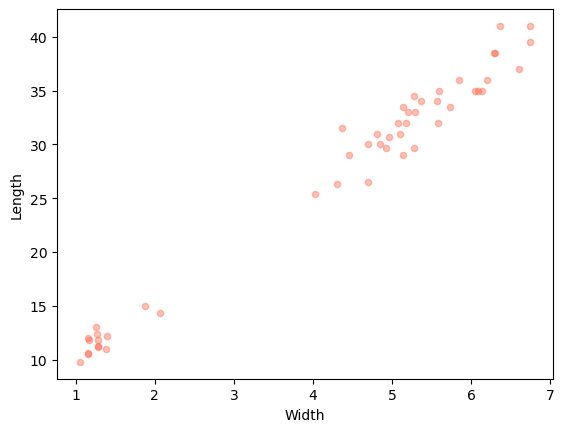

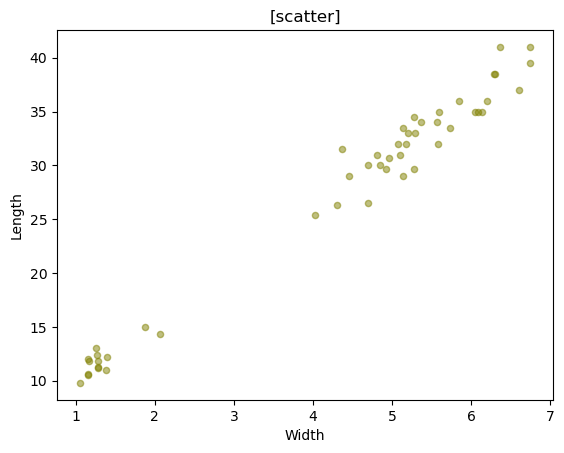

In [84]:
#pandas의 Series, DataFrame의 plot메서드
# 데이터프레임명.plot() --> 꺾은선 그래프 (값 지정할 필요없이 자동 출력)
#feature.plot()

# 산점도 그래프
feature.plot.scatter(x = 'Width', y = 'Length', color = 'tomato', alpha =0.4, legend='sad') #scatter로 그릴 때는 x, y 값을 지정해야함.

feature.plot(kind='scatter', title='[scatter]', x='Width', y = 'Length', c='olive', alpha=0.5)


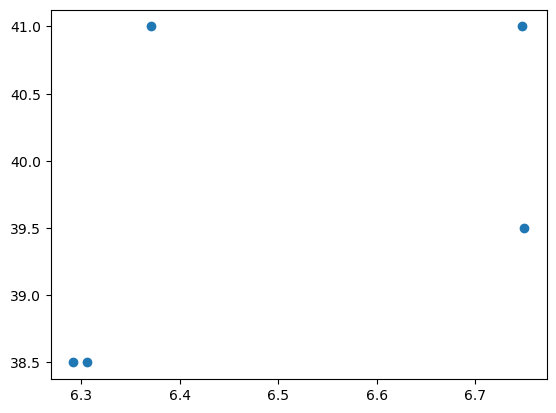

In [85]:
plt.scatter(kneighborDF['Width'], kneighborDF['Length'])

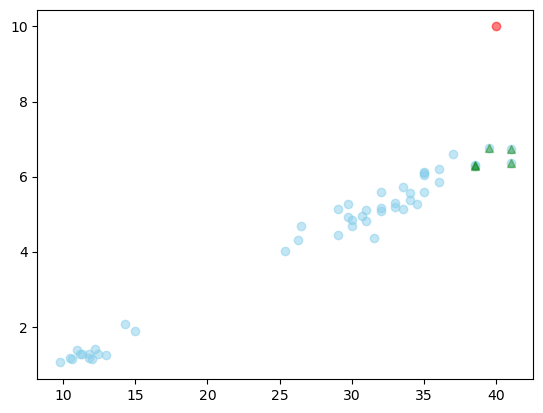

In [86]:
plt.scatter(x=feature.Length, y=feature.Width, c = 'skyblue', alpha=0.5)
plt.plot(bdata.Length[0], bdata.Width[0],'ro',alpha=0.5)
plt.plot(kneighborDF.Length, kneighborDF.Width, 'g^', alpha=0.4)
plt.show()